# Comparing theoretical models of probability of coincidence to data

## Module imports and formatting

In [1]:
import pandas as pd
import numpy as np

#Pyrepseq imports
import pyrepseq as prs
import pyrepseq.plotting as rsp
import pyrepseq.distance as rsd
import pyrepseq.stats as rss

#Plotting imports
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.style 
import matplotlib as mpl 
import seaborn as sns


#Scipy imports
from scipy.optimize import curve_fit

In [2]:
#Set default plotting parameters
mpl.rcParams['figure.figsize'] = [4.0, 4.0] 
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=500 


SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Data

In [3]:
pcD_back = pcD_back = prs.load_pcDelta_background(return_bins=True)[0]["beta"]
pcD_spc = pd.read_csv('mira_pcd_spc.csv').set_index('Delta')["0"]

In [4]:
data_exp = pcD_spc/pcD_back*(pcD_back/pcD_spc)[0]
deltas = np.arange(0,len(data_exp))

## Continuous model

We will assume that the link between $\Delta$ and $\Delta E$ is:

$$\Delta E = a\Delta$$

Where $a$ is the average energy penalty per edit in units of $kT$.

For a single motif we have:

$$p_s(\Delta)_{continuous} = \frac{1+e^{- E^*}}{1+e^{(\Delta E - E^*)}}$$

In [5]:
def con_model(x, E_star, a, C):
    
    return (1+np.exp(-E_star))/(1+np.exp((a*x- E_star))) + C

In [6]:
def binary_model(x, c, C):
    
    return ((c-1)/19)**x + C

In [7]:
min_dist = 0
max_dist = 11

In [8]:
fit_con = curve_fit(con_model, deltas[min_dist:max_dist], data_exp[min_dist:max_dist])[0]
fit_binary = curve_fit(binary_model, deltas[min_dist:max_dist], data_exp[min_dist:max_dist])[0]

/var/folders/cw/c094k5y90lg8zmsxks2359c80000gn/T/ipykernel_94921/3812759588.py:3: RuntimeWarning: overflow encountered in exp
  return (1+np.exp(-E_star))/(1+np.exp((a*x- E_star))) + C
/var/folders/cw/c094k5y90lg8zmsxks2359c80000gn/T/ipykernel_94921/3812759588.py:3: RuntimeWarning: invalid value encountered in divide
  return (1+np.exp(-E_star))/(1+np.exp((a*x- E_star))) + C


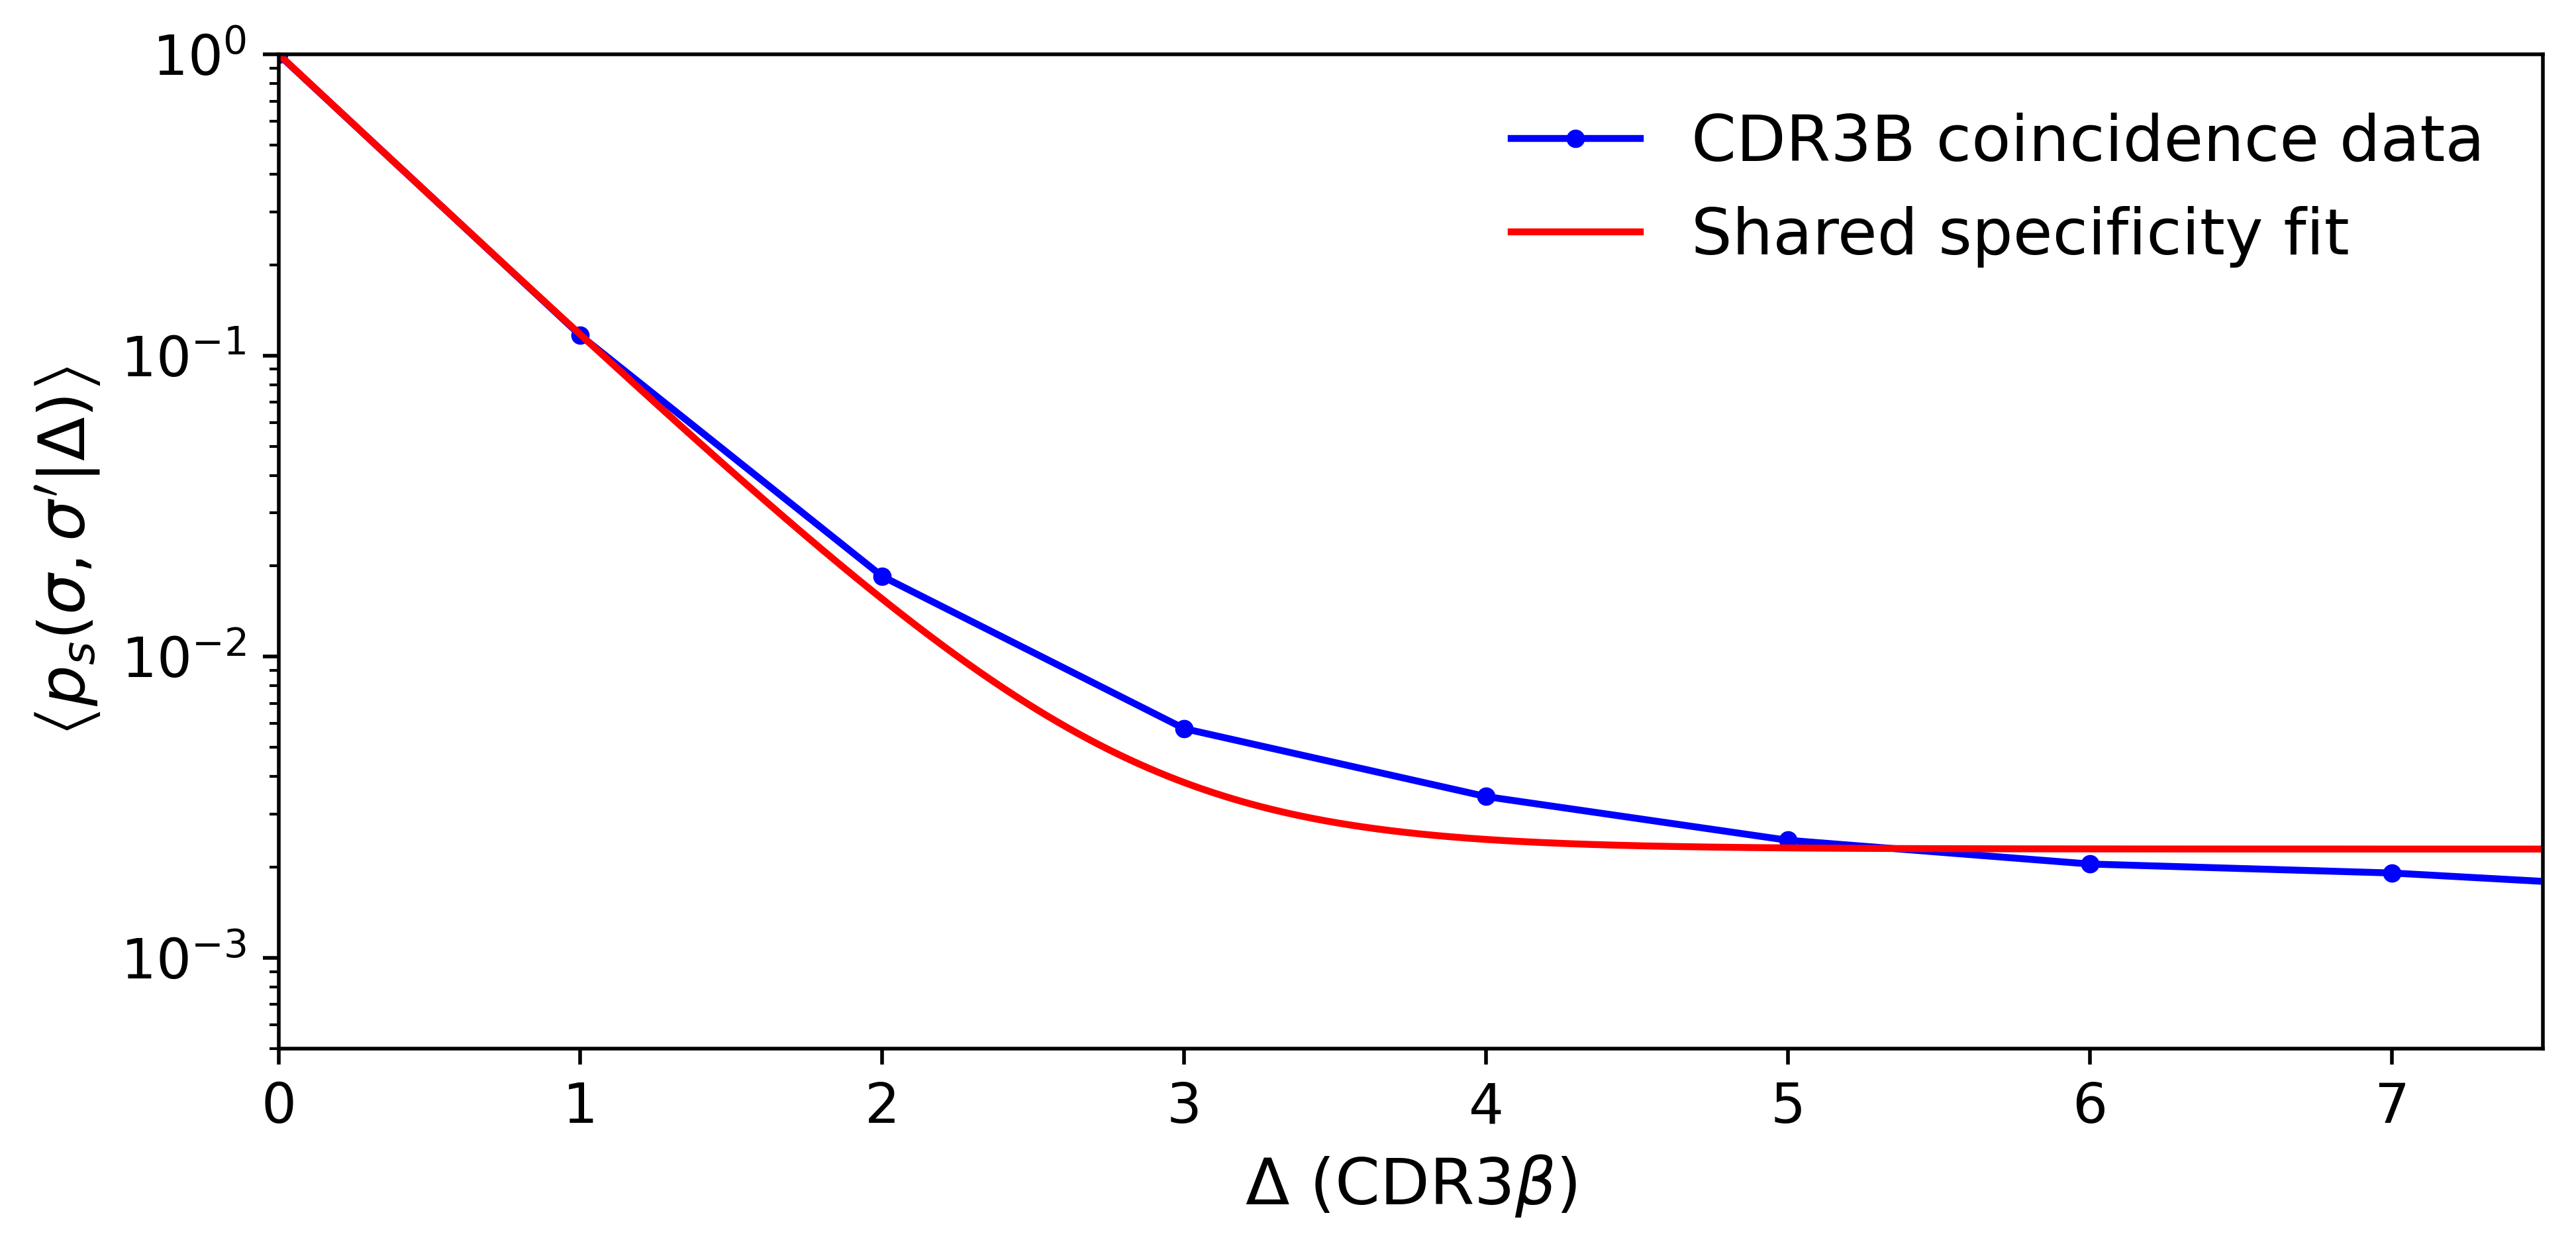

In [9]:
fig,ax = plt.subplots(figsize=(8,4))

deltas = np.arange(0,24)
N = np.linspace(0,max_dist,10000)


ax.plot(deltas[:max_dist],data_exp[:max_dist],marker='.', c= 'blue', label="CDR3B coincidence data")
ax.plot(N,con_model(N,*fit_con),c= 'red', label = "Shared specificity fit ")

ax.set_xlabel(r'$\Delta$ (CDR3$\beta$)')
ax.set_ylabel(r'$\left<p_s(\sigma,\sigma^\prime|\Delta)\right>$')
ax.set_yscale("log")
ax.set_ylim([0.5e-3, 1])
ax.set_xlim([0, 7.5])
plt.tight_layout()
ax.legend()
plt.savefig('model_fits.png', dpi=500);

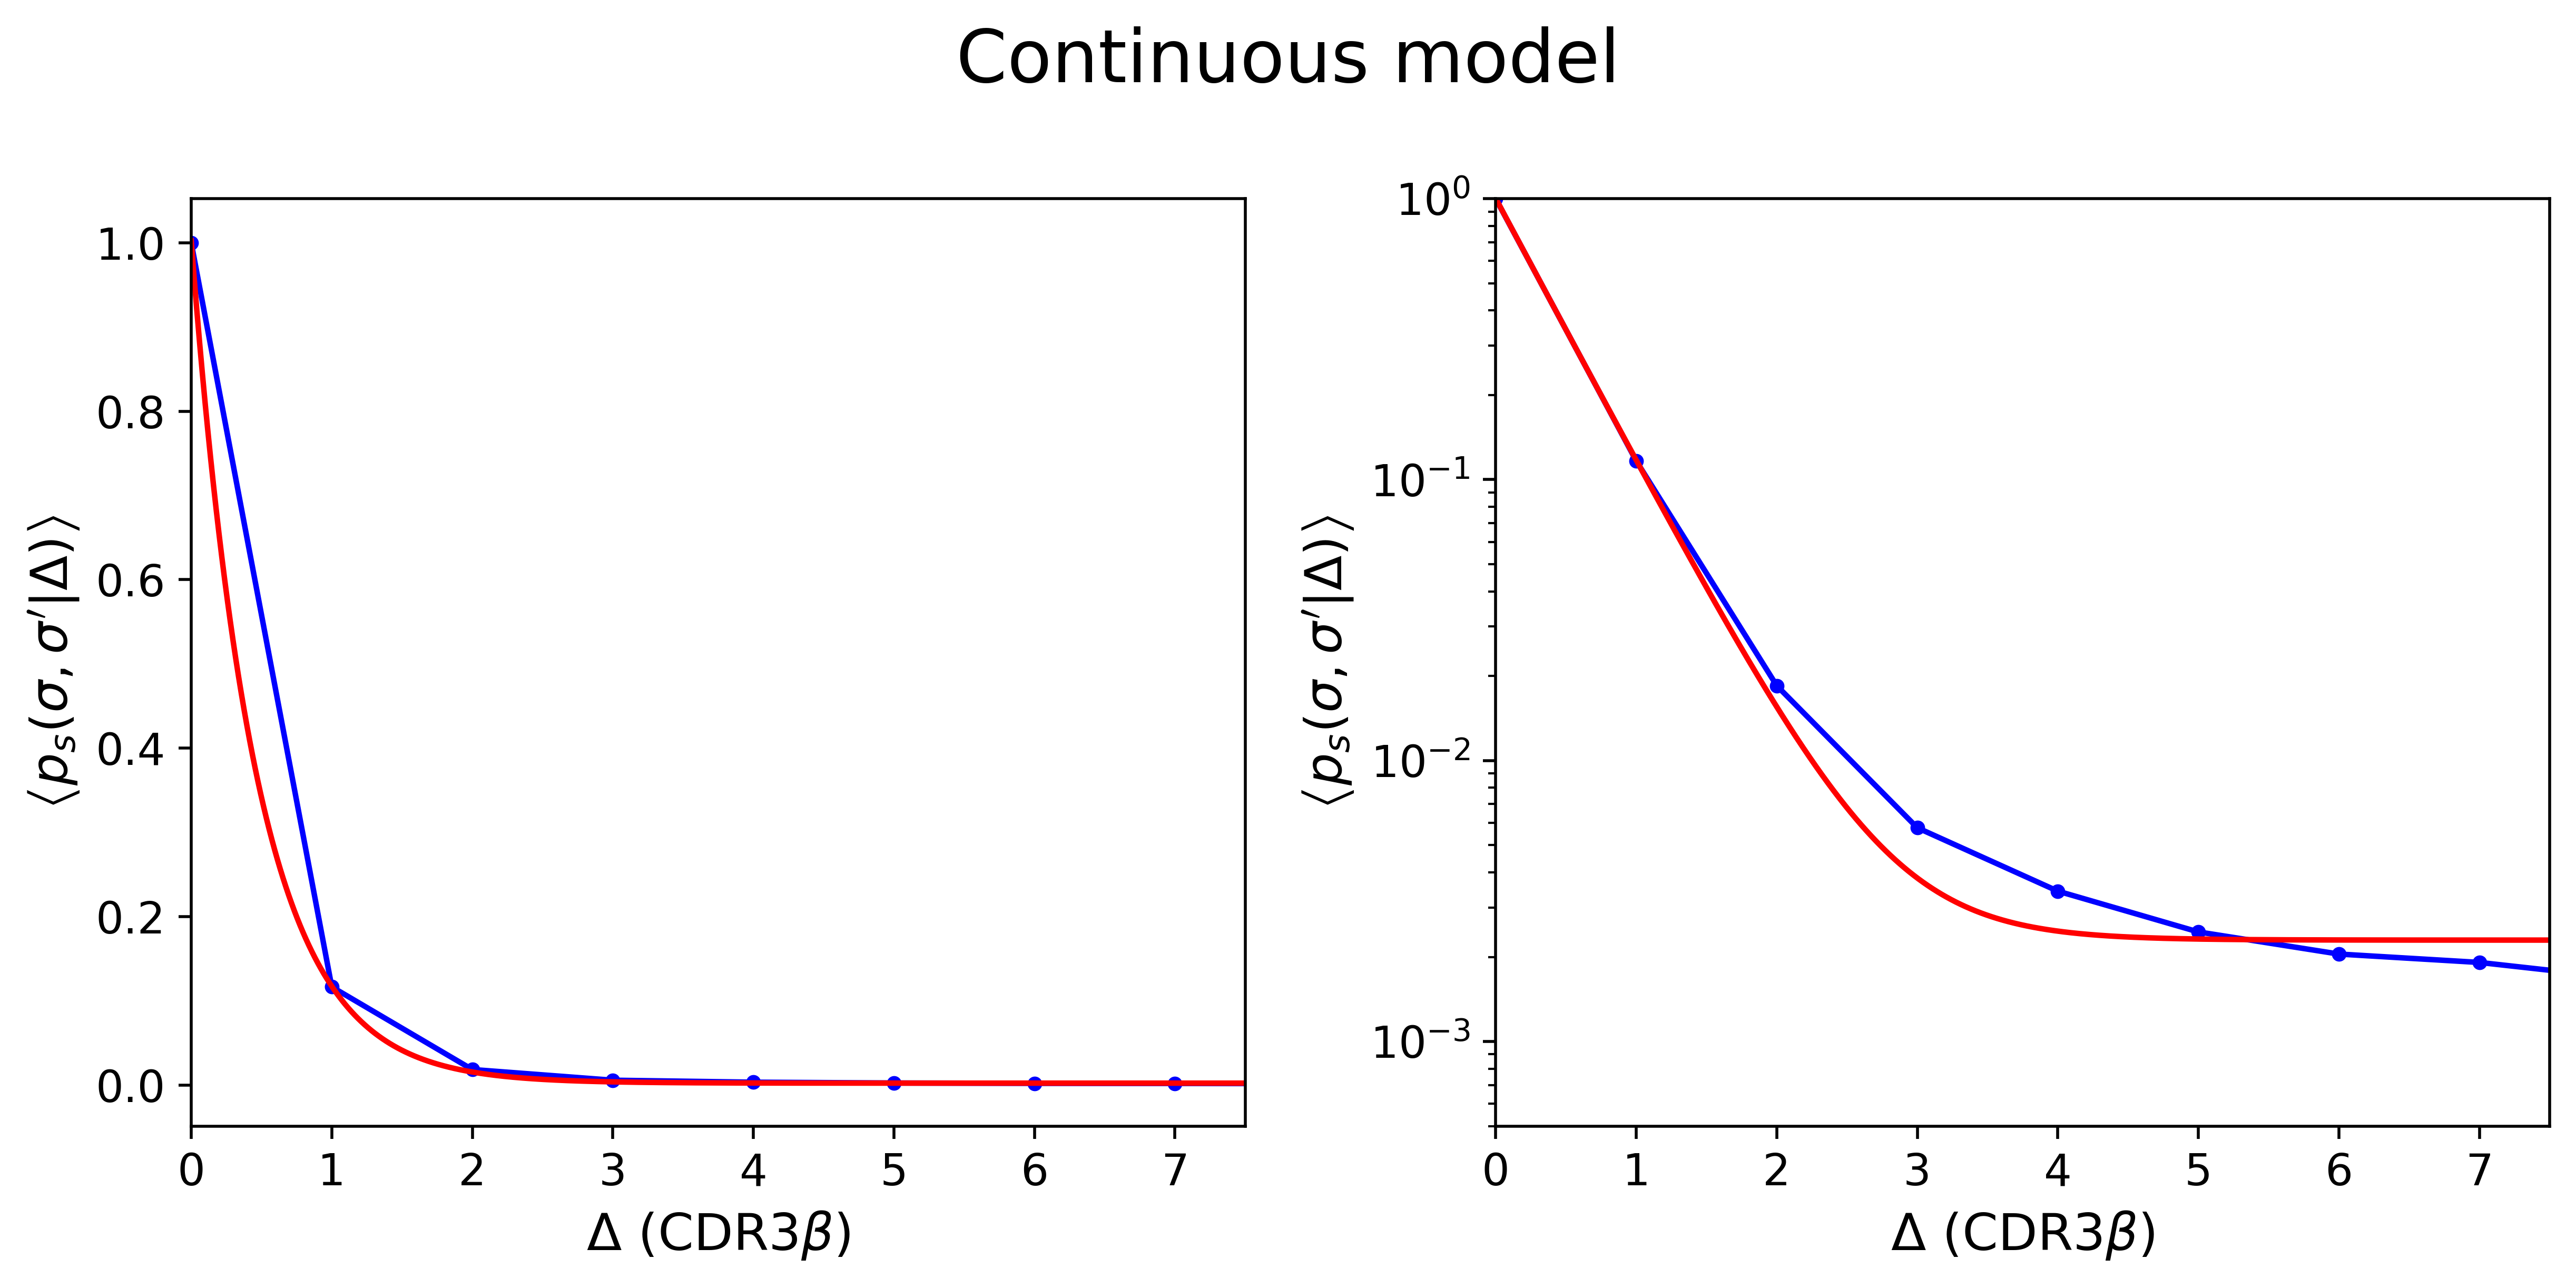

In [10]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

deltas = np.arange(0,24)
N = np.linspace(0,max_dist,10000)
ax[0].plot(deltas[:max_dist],data_exp[:max_dist],marker='.',label=r"Experimental data",  c= 'blue')
ax[0].plot(N,con_model(N,*fit_con),label=r"Single motif model", c= 'red')
ax[0].set_xlim([0, 7.5])


ax[0].set_xlabel(r'$\Delta$ (CDR3$\beta$)')
ax[0].set_ylabel(r'$\left<p_s(\sigma,\sigma^\prime|\Delta)\right>$')

ax[1].plot(deltas[:max_dist],data_exp[:max_dist],marker='.',label=r"Experimental data", c= 'blue')
ax[1].plot(N,con_model(N,*fit_con),label=r"Single motif model", c= 'red')

ax[1].set_xlabel(r'$\Delta$ (CDR3$\beta$)')
ax[1].set_ylabel(r'$\left<p_s(\sigma,\sigma^\prime|\Delta)\right>$')
ax[1].set_yscale("log")
ax[1].set_ylim([0.5e-3, 1])
ax[1].set_xlim([0, 7.5])
fig.suptitle('Continuous model')
plt.tight_layout();

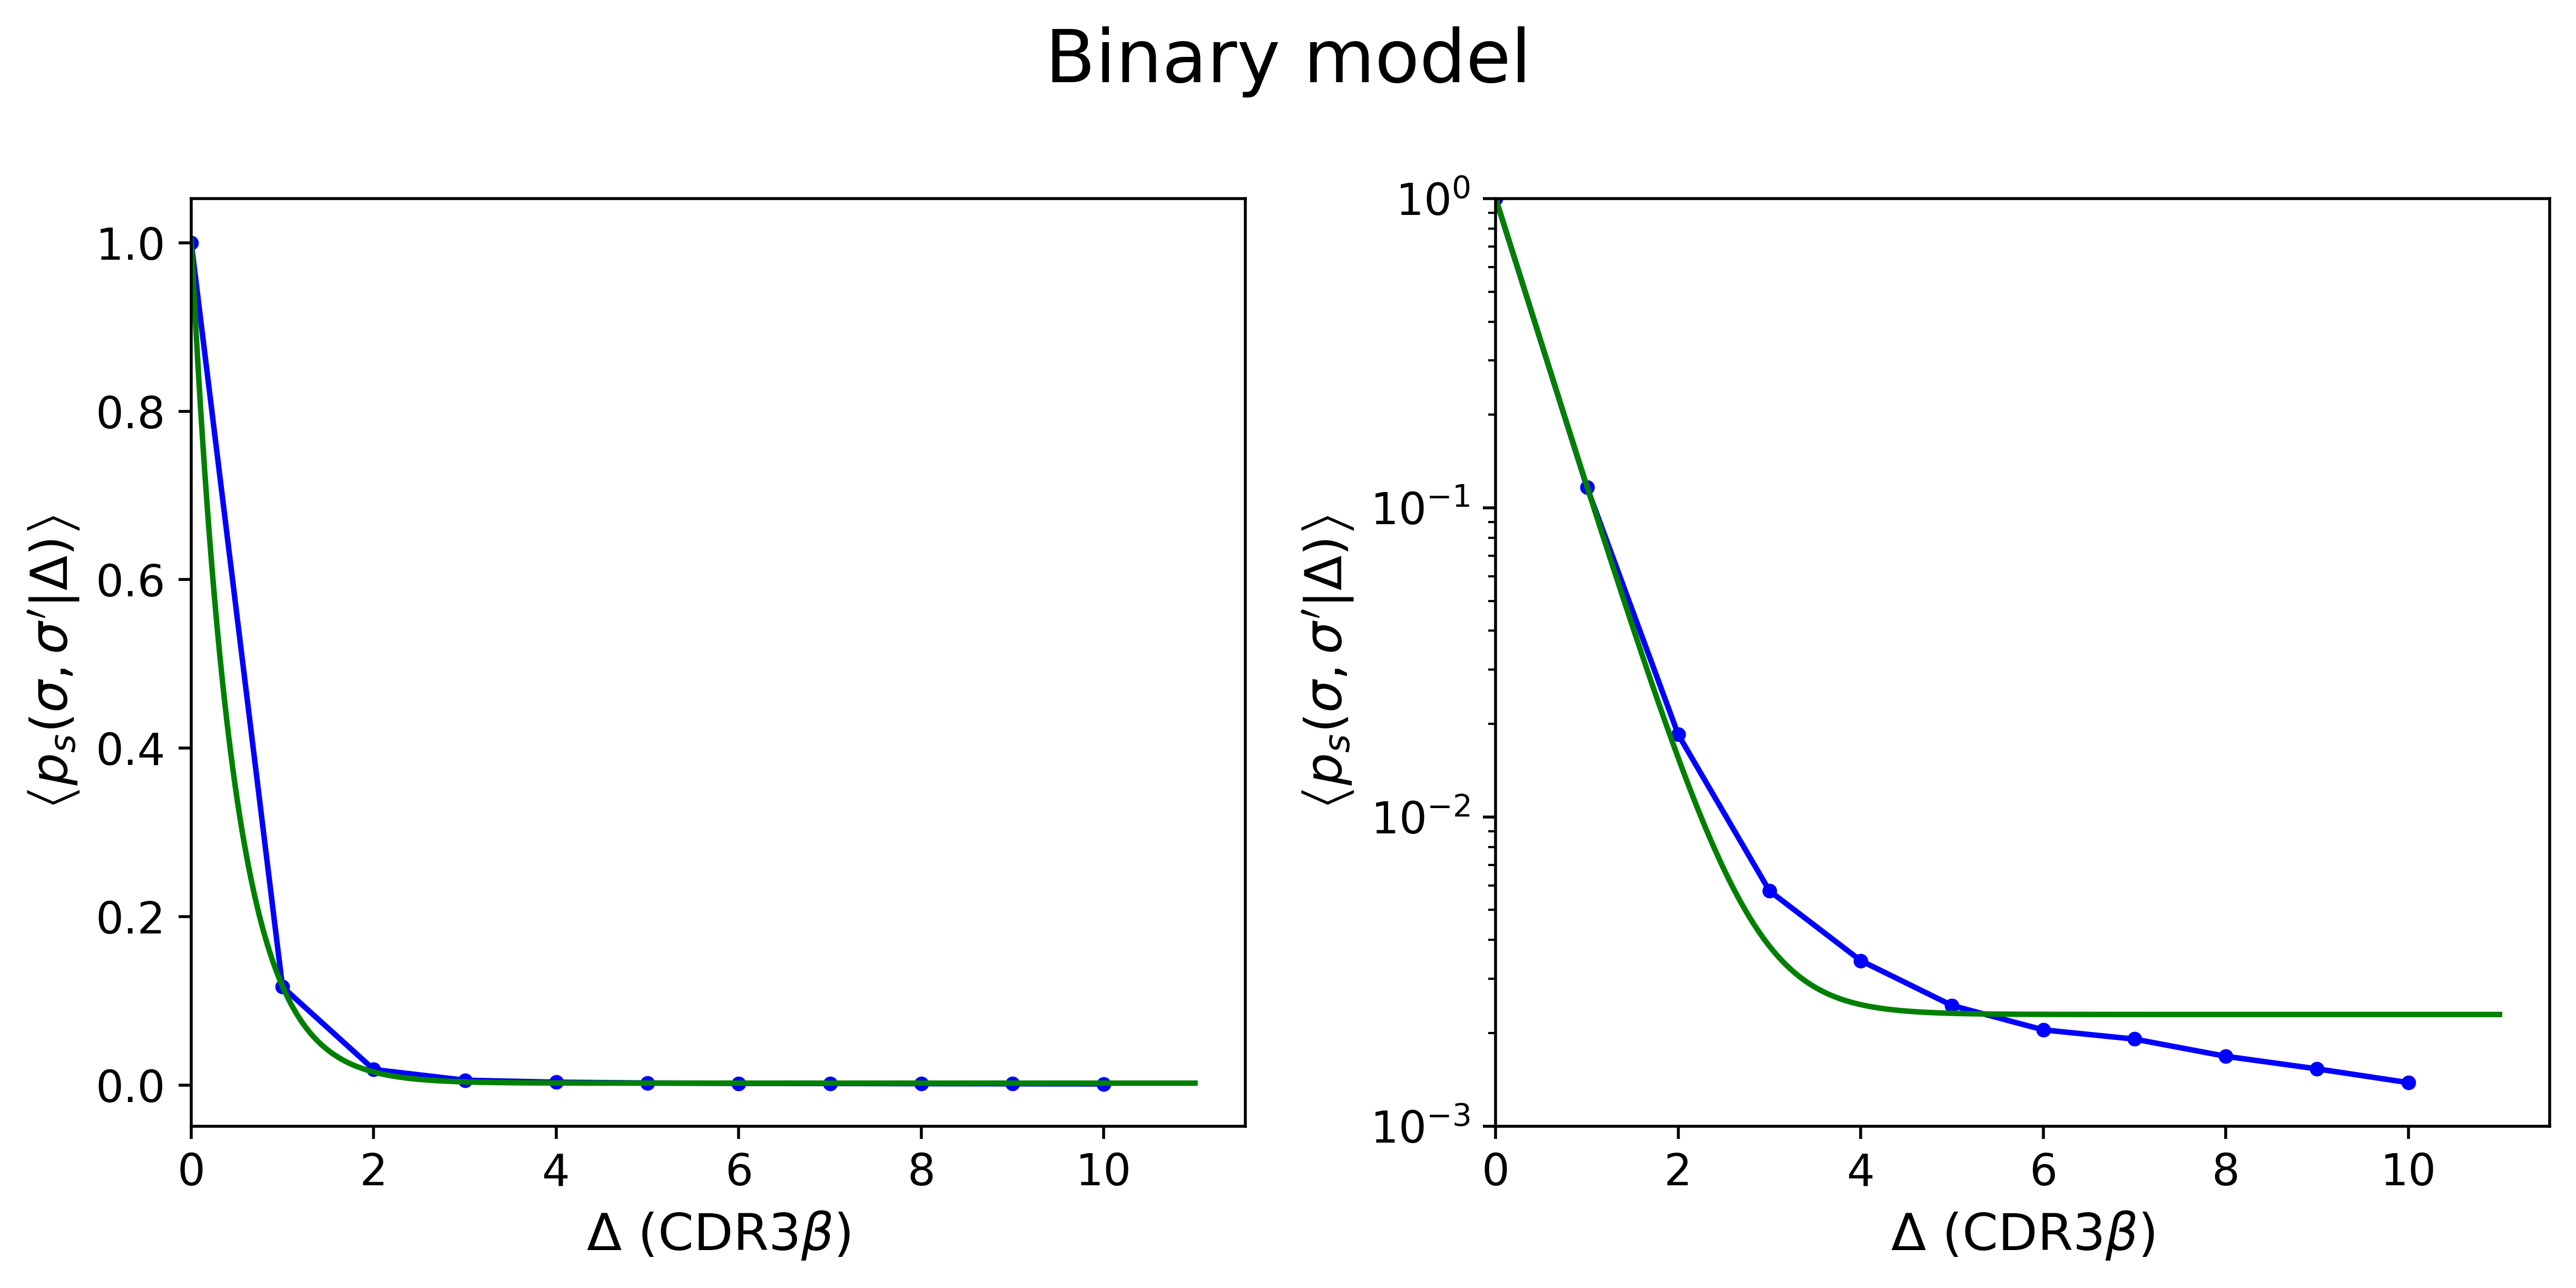

In [11]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

deltas = np.arange(0,24)
N = np.linspace(0,max_dist,10000)
ax[0].plot(deltas[:max_dist],data_exp[:max_dist],marker='.',label=r"Experimental data",  c= 'blue')
ax[0].plot(N,binary_model(N,*fit_binary),label=r"Single motif model", c= 'green')

ax[0].set_xlabel(r'$\Delta$ (CDR3$\beta$)')
ax[0].set_ylabel(r'$\left<p_s(\sigma,\sigma^\prime|\Delta)\right>$')
ax[0].set_xlim([0, None])

ax[1].plot(deltas[:max_dist],data_exp[:max_dist],marker='.',label=r"Experimental data", c= 'blue')
ax[1].plot(N,binary_model(N,*fit_binary),label=r"Single motif model", c= 'green')

ax[1].set_xlabel(r'$\Delta$ (CDR3$\beta$)')
ax[1].set_ylabel(r'$\left<p_s(\sigma,\sigma^\prime|\Delta)\right>$')
ax[1].set_yscale("log")
ax[1].set_ylim([1e-3, 1])
ax[1].set_xlim([0, None])
fig.suptitle('Binary model')
plt.tight_layout();

## Residuals between binary and continuous model

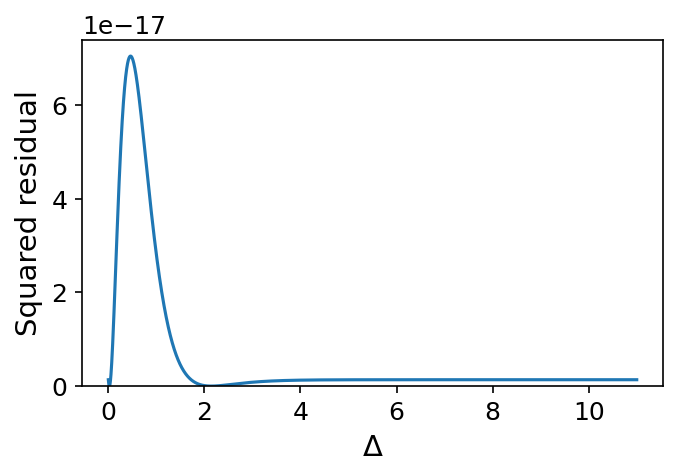

In [12]:
fig, ax = plt.subplots(figsize=(5,3), dpi =150)

N = np.linspace(0,max_dist,10000)

ax.plot(N,(binary_model(N,*fit_binary)-con_model(N,*fit_con))**2)
ax.set_xlabel("$\Delta$")
ax.set_ylabel("Squared residual")
ax.set_ylim([0,None]);